# Load Packages and Data

In [2]:
from pycaret.regression import * 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
#from pandas_profiling import ProfileReport
from ydata_profiling import ProfileReport 
#import warnings
#warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\senay\Desktop\AbsentData\car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
#!pip install pandas_profiling

In [ ]:
 #pip install ydata-profiling

In [5]:
#ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Exploriatory Analysis

In [17]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [16]:
#df.corr()
df.select_dtypes(include='number').corr()


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


<AxesSubplot: >

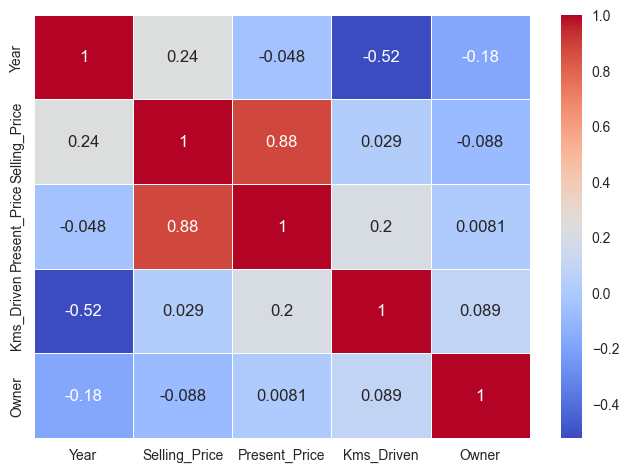

In [20]:
#df.corr()
#sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm',linewidth=0.5)
df_corr=df.select_dtypes(include='number').corr()
sns.heatmap(df_corr, annot=True, cmap = 'coolwarm',linewidth=0.5)

<AxesSubplot: >

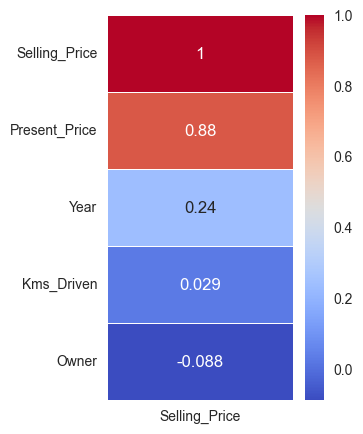

In [24]:
plt.figure(figsize=(3,5))

#sns.heatmap(df.corr()[['Selling_Price']].sort_values(by='Selling_Price',ascending=False), annot=True, cmap = 'coolwarm',linewidth=0.5)

sns.heatmap(df_corr[['Selling_Price']].sort_values(by='Selling_Price',ascending=False)\
            , annot=True, cmap = 'coolwarm',linewidth=0.5)

<AxesSubplot: xlabel='Selling_Price', ylabel='Density'>

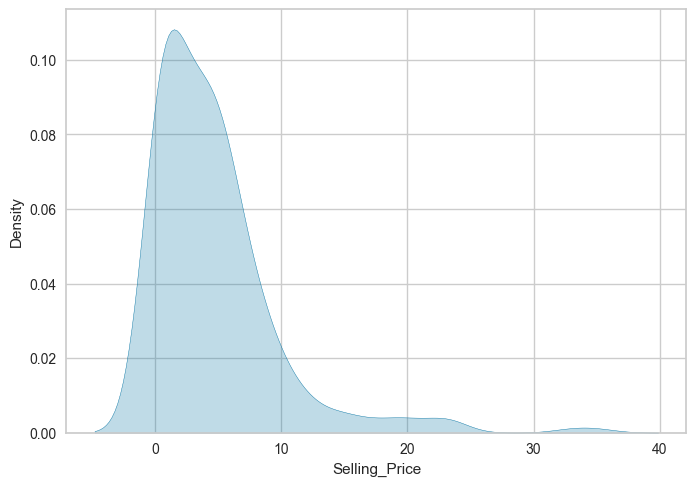

In [25]:
sns.kdeplot(df['Selling_Price'], shade=True)

<AxesSubplot: ylabel='Selling_Price'>

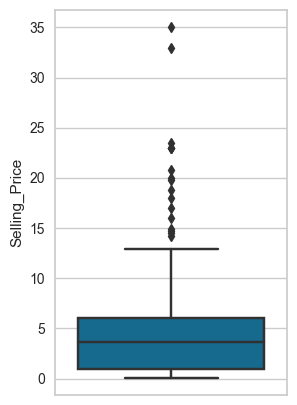

In [28]:
plt.figure(figsize=(3,5))
sns.boxplot(y= df['Selling_Price'])

# Pycaret Enviroment Setup

In [30]:
#pip install --upgrade pandas dask


   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.2 MB 409.6 kB/s eta 0:00:03
   --------- ------------------------------ 0.3/1.2 MB 1.4 MB/s eta 0:00:01
   --------------------- ------------------ 0.6/1.2 MB 2.9 MB/s eta 0:00:01
   ---------------------------------------  1.2/1.2 MB 4.1 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 3.9 MB/s eta 0:00:00
  Attempting uninstall: dask
    Found existing installation: dask 2.12.0
    Uninstalling dask-2.12.0:
      Successfully uninstalled dask-2.12.0


In [31]:
setup(df,target='Selling_Price', train_size=0.7, session_id=123 )

,Description,Value
0,Session id,123
1,Target,Selling_Price
2,Target type,Regression
3,Original data shape,"(301, 9)"
4,Transformed data shape,"(301, 11)"
5,Transformed train set shape,"(210, 11)"
6,Transformed test set shape,"(91, 11)"
7,Ordinal features,2
8,Numeric features,4
9,Categorical features,4


In [32]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,1.2179,3.6681,1.8197,0.8607,0.3599,1.1724,0.0500
lr,Linear Regression,1.2197,3.6557,1.8188,0.8603,0.3600,1.1786,2.3280
br,Bayesian Ridge,1.2179,3.8108,1.8417,0.8595,0.3602,1.1570,0.0560
lar,Least Angle Regression,1.2410,6.4345,2.1105,0.8194,0.3401,1.1070,0.0520
en,Elastic Net,1.3211,5.6378,2.1525,0.8126,0.3644,1.0092,0.0550
lasso,Lasso Regression,1.3546,5.8500,2.1865,0.8065,0.3579,0.9818,0.8190
llar,Lasso Least Angle Regression,1.3546,5.8502,2.1866,0.8065,0.3579,0.9818,0.0530
et,Extra Trees Regressor,1.2492,6.2349,2.1353,0.8026,0.4685,1.4567,0.1070
huber,Huber Regressor,1.3127,6.0649,2.1608,0.7955,0.2901,0.7157,0.0580
gbr,Gradient Boosting Regressor,1.2403,6.1788,2.0781,0.7821,0.4475,1.3567,0.0670


Ridge(random_state=123)

In [33]:
model = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.5665,5.1320,2.2654,0.7965,0.4919,1.4648
1,1.1684,2.4941,1.5793,0.8009,0.3344,0.7749
2,1.5411,4.6727,2.1616,0.8350,0.4573,2.5186
3,1.1863,2.2220,1.4906,0.9293,0.4848,1.7551
4,0.8529,1.2268,1.1076,0.9624,0.1465,0.3570
5,0.8625,1.1822,1.0873,0.8859,0.3877,1.4714
6,1.3614,7.8432,2.8006,0.8749,0.2478,0.5148
7,1.0117,1.4788,1.2161,0.8261,0.4093,1.6674
8,1.3989,6.8035,2.6084,0.8623,0.3771,0.9042


In [34]:
t_model = tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.5665,5.1320,2.2654,0.7965,0.4919,1.4648
1,1.1684,2.4941,1.5793,0.8009,0.3344,0.7749
2,1.5411,4.6727,2.1616,0.8350,0.4573,2.5186
3,1.1863,2.2220,1.4906,0.9293,0.4848,1.7551
4,0.8529,1.2268,1.1076,0.9624,0.1465,0.3570
5,0.8625,1.1822,1.0873,0.8859,0.3877,1.4714
6,1.3614,7.8432,2.8006,0.8749,0.2478,0.5148
7,1.0117,1.4788,1.2161,0.8261,0.4093,1.6674
8,1.3989,6.8035,2.6084,0.8623,0.3771,0.9042


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [35]:
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Predictions 

In [36]:
final_df = predict_model(model)
final_df.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,1.2700,5.3781,2.3191,0.6921,0.4624,2.1912


,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price,prediction_label
204,eon,2015,4.43,28282,Petrol,Dealer,Manual,0,2.75,3.464620
114,Royal Enfield Classic 350,2015,1.47,17000,Petrol,Individual,Manual,0,1.15,1.054685
166,Hero Passion Pro,2016,0.55,1000,Petrol,Individual,Manual,0,0.45,1.685933
279,city,2014,13.60,40126,Petrol,Dealer,Manual,0,6.25,7.849643
294,amaze,2014,6.80,33019,Petrol,Dealer,Manual,0,3.75,4.349362


# Plot Model

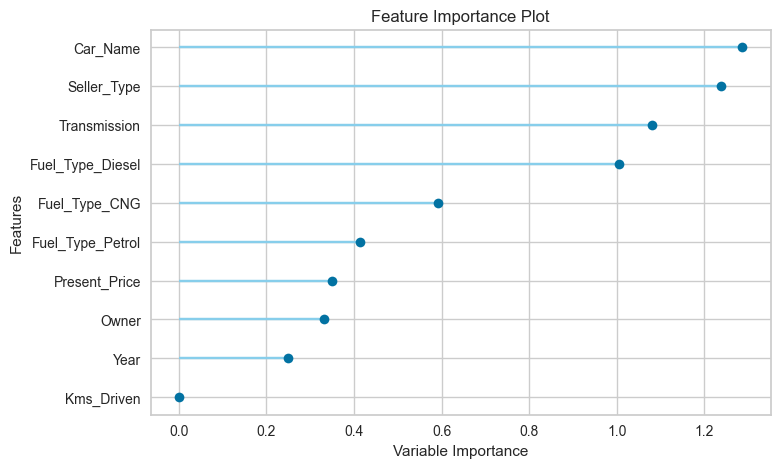

In [39]:
plot_model(model, 'feature')

# Saving the Model

In [40]:
save_model(model, 'trial_reg')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Year', 'Present_Price',
                                              'Kms_Driven', 'Owner'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Car_Name', 'Fuel_Type',
                                              'Seller_Type', 'Transmission'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  Tra...
 dtype: int64}]))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['Fuel_Type'],
                                     transformer=OneHotEncoder(cols=['Fuel_Type'],
                                                               handle_missing='return_nan',
                                                               use_cat_name

In [44]:
# get coefficients
pd.DataFrame(zip(model.feature_names_in_,model.coef_),columns =['Features','Coefficients'])

,Features,Coefficients
0,Car_Name,1.287010
1,Year,0.249938
2,Present_Price,0.350443
3,Kms_Driven,-0.000032
4,Fuel_Type_Petrol,-0.414167
5,Fuel_Type_Diesel,1.005166
6,Fuel_Type_CNG,-0.590999
7,Seller_Type,-1.237663
8,Transmission,-1.080442
9,Owner,-0.330733


In [45]:
coef = pd.DataFrame(zip(model.feature_names_in_,model.coef_),columns =['Features','Coefficients'])
coef

,Features,Coefficients
0,Car_Name,1.287010
1,Year,0.249938
2,Present_Price,0.350443
3,Kms_Driven,-0.000032
4,Fuel_Type_Petrol,-0.414167
5,Fuel_Type_Diesel,1.005166
6,Fuel_Type_CNG,-0.590999
7,Seller_Type,-1.237663
8,Transmission,-1.080442
9,Owner,-0.330733


In [ ]:
#open conda prompt, make sure pycaret is installed

#open power bi via conda prompt

#make sure power bi python source/directory is anaconda 3

#import Mall customers csv to power bi and duplicate it 

#to the duplicated source, call it prediction table apply python scripting below, where import our tiral_reg file 

#import pandas as pd
#from pycaret.regression import * 
#model = load_model("C:/Users/senay/Desktop/AbsentData/trial_reg")
#prediction_df = predict_model(model, data = dataset)

In [46]:

#create custom column called residuals which are [prediction_label] - [Selling_Price]

In [ ]:
#duplicate prediction table, call it coefficient table and add coef , so the python script is: 
#import pandas as pd
#from pycaret.regression import * 
#model = load_model("C:/Users/senay/Desktop/AbsentData/trial_reg")
#prediction_df = predict_model(model, data = dataset)
#coef = pd.DataFrame(zip(model.feature_names_in_,model.coef_),columns =['Features','Coefficients'])
#coef

In [50]:
#pd.DataFrame(zip(model.feature_names_in_,model.feature_importances_),columns=['Features','Importance'])

